In [41]:
!pip install ultralytics opencv-python

^C


In [1]:
import pandas as pd

https://ale.farama.org/environments/frogger/
\n
https://ale.farama.org/environments/

In [5]:
import gymnasium as gym
import os
import ale_py
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np

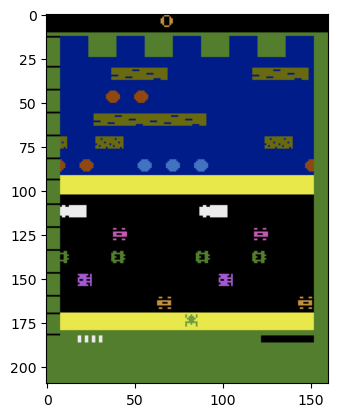

In [3]:
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, info = env.reset()
plt.imshow(obs)
plt.show()

In [11]:
import numpy as np
# Initialize the environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()
frame = env.render()

frame = np.array(frame)

# Define a function to handle mouse clicks and print RGB values
def get_rgb(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        r, g, b = frame[y, x]  # Already in RGB format
        print(f"RGB Value at ({x}, {y}): R={r}, G={g}, B={b}")

# Set up a window and a mouse callback to check RGB values
cv2.imshow("Frogger Frame", frame)
cv2.setMouseCallback("Frogger Frame", get_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

env.close()


RGB Value at (72, 87): R=66, G=114, B=194
RGB Value at (25, 85): R=144, G=72, B=17
RGB Value at (87, 60): R=105, G=105, B=15
RGB Value at (107, 51): R=0, G=28, B=136


In [12]:
corners = []
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()
frame = env.render()

frame = np.array(frame)
# Define a function to handle mouse clicks and record the corner coordinates
def get_corners(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        corners.append((x, y))
        print(f"Corner {len(corners)} clicked at: ({x}, {y})")
        # Draw a circle at the clicked corner
        cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)  # Red circle for the corners
        # Display the updated image
        cv2.imshow("Select Corners", frame)
        
        # If 4 corners are selected, proceed
        if len(corners) == 4:
            print("All 4 corners selected!")
            # Optionally crop the image to the identified corners
            x1, y1 = corners[0]  # Top-left corner
            x2, y2 = corners[2]  # Bottom-right corner
            cropped_game_window = frame[y1:y2, x1:x2]
            cv2.imshow("Cropped Game Window", cropped_game_window)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            env.close()

# Set up a window and a mouse callback to select corners
cv2.imshow("Select Corners", frame)
cv2.setMouseCallback("Select Corners", get_corners)

cv2.waitKey(0)
cv2.destroyAllWindows()

Corner 1 clicked at: (32, 27)


frog values: R=110, G=156, B=66
Gree car:  R=82, G=126, B=45
Yellow car: R=195, G=144, B=61
Purple car: R=164, G=89, B=208
Pink car: R=198, G=89, B=179
white car: R=236, G=236, B=236
blue lillies: R=66, G=114, B=194
brown lillies: R=144, G=72, B=17
log:  R=105, G=105, B=15
Water: 8,28,140

In [ ]:

obs, info = env.reset()
start_time = time.time()
print("start time:", start_time)
score = 0

for _ in range(1000):
    action = env.action_space.sample() 
    obs, reward, terminated, truncated, info = env.step(action)
    score += reward

    plt.figure(figsize=(6, 6))  # Create a new figure
    plt.imshow(obs)  # Display the observation
    plt.axis("off")  # Hide axes
    plt.show() 
    
    if terminated or truncated:
        break
elapsed_time = time.time() - start_time
print(elapsed_time)
print(f"Final Score: {score}")



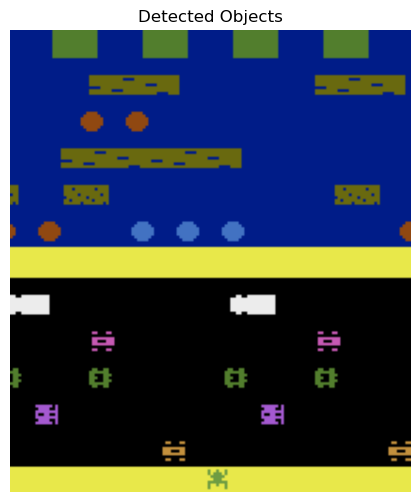

No objects detected.


In [6]:
obs, info = env.reset()
object_colors = {
    'frog': ((110, 156, 66), (120, 166, 76)),
    'green_car': ((82, 126, 45), (92, 136, 55)),
    'yellow_car': ((195, 144, 61), (205, 154, 71)),
    'purple_car': ((164, 89, 208), (174, 99, 218)),
    'pink_car': ((198, 89, 179), (208, 99, 189)),
    'white_car': ((236, 236, 236), (246, 246, 246)),
    'blue_lillies': ((66, 114, 194), (76, 124, 204)),
    'brown_lillies': ((144, 72, 17), (154, 82, 27)),
    'log': ((105, 105, 10), (115, 115, 25)),
   # 'water': ((0, 28, 136), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 15)
corner2 = (151, 14)
corner3 = (151, 179)
corner4 = (9, 179)

cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Process the image to find objects
def detect_objects(image_bgr, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_bgr, lower, upper)
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            # Filter small contours
            if cv2.contourArea(contour) > 500:  # Change this threshold as needed
                x, y, w, h = cv2.boundingRect(contour)
                detected_objects.append((label, (x, y, w, h)))

    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(cropped_image, object_colors)

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cropped_image)
ax = plt.gca()

# Draw bounding boxes
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()
# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")
env.close()

Detected objects:
green_car at position (106, 101) with width 12 and height 11
green_car at position (74, 101) with width 12 and height 11
green_car at position (26, 101) with width 12 and height 11
yellow_car at position (52, 127) with width 12 and height 11
purple_car at position (87, 114) with width 12 and height 11
purple_car at position (7, 114) with width 12 and height 11
pink_car at position (107, 88) with width 12 and height 11
pink_car at position (27, 88) with width 12 and height 11
white_car at position (76, 75) with width 20 and height 11
white_car at position (0, 75) with width 16 and height 11
blue_lillies at position (41, 49) with width 44 and height 11
brown_lillies at position (0, 49) with width 20 and height 11
brown_lillies at position (23, 10) with width 28 and height 11
log at position (113, 36) with width 20 and height 11
log at position (16, 23) with width 68 and height 24
log at position (106, 0) with width 36 and height 8
log at position (26, 0) with width 36 a

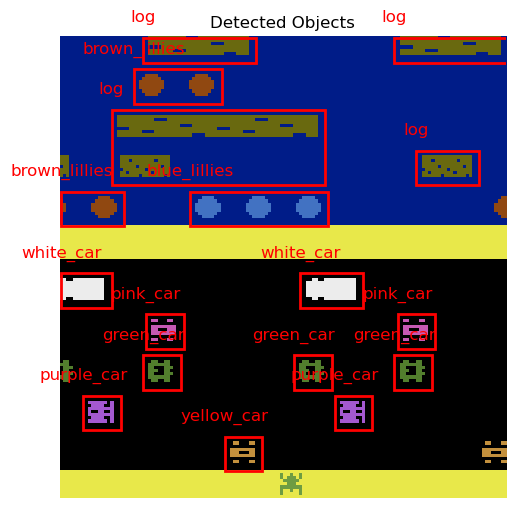

In [22]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)

        # Apply morphological operations to improve the mask (dilate and erode)
        mask = cv2.dilate(mask, None, iterations=4)
        mask = cv2.erode(mask, None, iterations=2)
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Loop over contours and filter by area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 100:  # Lower the threshold to capture more objects
                x, y, w, h = cv2.boundingRect(contour)
                detected_objects.append((label, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

Detected objects:
frog at position (68, 137) with width 11 and height 10
green_car at position (106, 101) with width 12 and height 11
green_car at position (74, 101) with width 12 and height 11
green_car at position (26, 101) with width 12 and height 11
yellow_car at position (132, 127) with width 10 and height 11
yellow_car at position (52, 127) with width 12 and height 11
purple_car at position (87, 114) with width 12 and height 11
purple_car at position (7, 114) with width 12 and height 11
pink_car at position (107, 88) with width 12 and height 11
pink_car at position (27, 88) with width 12 and height 11
white_car at position (76, 75) with width 20 and height 11
white_car at position (0, 75) with width 16 and height 11
blue_lillies at position (41, 49) with width 44 and height 11
brown_lillies at position (0, 49) with width 20 and height 11
brown_lillies at position (23, 10) with width 28 and height 11
log at position (114, 37) with width 18 and height 9
log at position (18, 37) wit

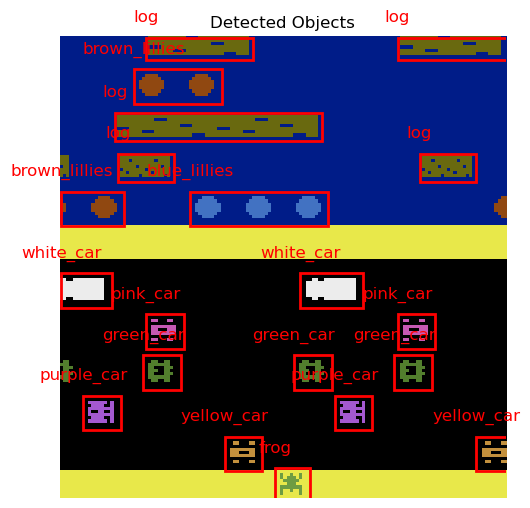

In [33]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # For logs, use different morphological operations to separate stacked objects
        if label == 'log':
            # Use less dilation to avoid merging nearby logs
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            # Use RETR_LIST instead of EXTERNAL to find all contours including nested ones
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # For other objects, use the original approach
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Loop over contours and filter by area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:  # Lower the threshold to capture more objects
                x, y, w, h = cv2.boundingRect(contour)
                
                # For logs, add additional check for height to better separate stacked logs
                if label == 'log' and h > 25:
                    # Split tall log objects into multiple logs based on typical log height
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        # Only add if it's still within the original bounding box
                        if log_y + log_height <= y + h:
                            detected_objects.append((label, (x, log_y, w, log_height)))
                else:
                    detected_objects.append((label, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

Detected objects:
frog at position (68, 137) with width 11 and height 10
car at position (106, 101) with width 12 and height 11
car at position (74, 101) with width 12 and height 11
car at position (26, 101) with width 12 and height 11
car at position (132, 127) with width 10 and height 11
car at position (52, 127) with width 12 and height 11
car at position (87, 114) with width 12 and height 11
car at position (7, 114) with width 12 and height 11
car at position (107, 88) with width 12 and height 11
car at position (27, 88) with width 12 and height 11
car at position (76, 75) with width 20 and height 11
car at position (0, 75) with width 16 and height 11
lily at position (73, 49) with width 12 and height 11
lily at position (57, 49) with width 12 and height 11
lily at position (41, 49) with width 12 and height 11
lily at position (8, 49) with width 12 and height 11
lily at position (39, 10) with width 12 and height 11
lily at position (23, 10) with width 12 and height 11
log at positi

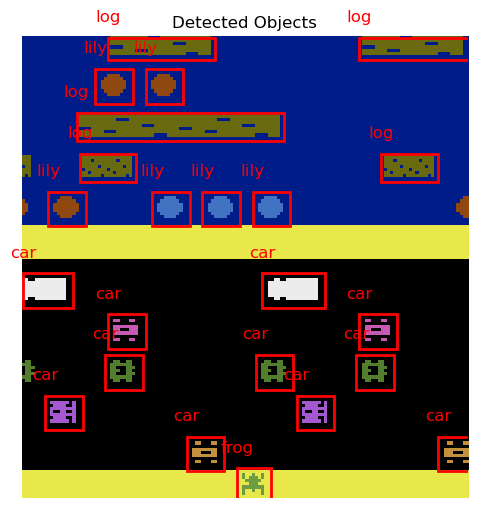

In [37]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()